## 0. 课程大纲

### 0.1 基于灰度的模板匹配
```python
cv.matchTemplate(img, template, method)
minv, maxv, minLoc, maxLoc = cv.minMaxLoc(img) # minLoc, maxLoc 先x后y
```

### 0.2 基于梯度的模板匹配


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 13. 模板匹配

In [3]:
# matchTemplate(img, template, method)
# minv, maxv, minloc, maxloc = cv.minMaxLoc(res)
# 最小值，最大值，最小位置（左上角），最大位置（左上角）

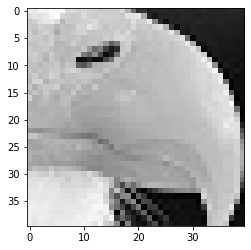

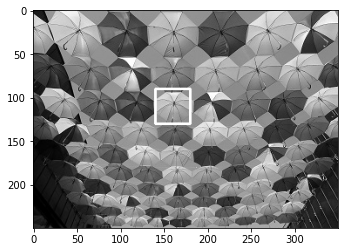

In [43]:
# 匹配单个
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# I = cv.imread("pic/eagle200x200.jpg", 0)
# T = I[40:80, 120:160]
# show(T)

I = cv.imread("pic/umbrella250x350.jpg", 0)

T = I[90:130, 140:180] # 40x40
# T = cv.resize(T, (30,30))

th, tw = T.shape[:2]

res = cv.matchTemplate(I, T, cv.TM_CCOEFF_NORMED)

minv, maxv, minloc, maxloc = cv.minMaxLoc(res)

top_left = maxloc
bottom_right = (top_left[0] + tw, top_left[1] + th)
cv.rectangle(I, top_left, bottom_right, 255, 2)

show(I)

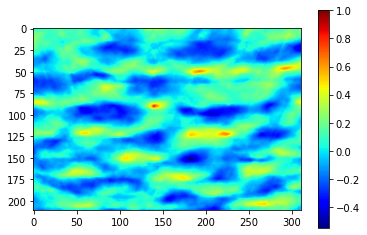

In [4]:
plt.imshow(res, cmap='jet')
plt.colorbar()
plt.show()

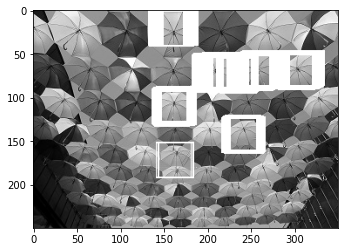

In [42]:
# 匹配多个
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# I = cv.imread("pic/eagle200x200.jpg", 0)
# T = I[40:80, 120:160]

I = cv.imread("pic/umbrella250x350.jpg", 0)

T = I[90:130, 140:180] # 40x40

# T = cv.resize(T, (30,30))
th, tw = T.shape[:2]

res = cv.matchTemplate(I, T, cv.TM_SQDIFF_NORMED)

thres = 0.05
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        if res[i,j] < thres:
            cv.rectangle(I, (j,i), (j+tw, i+th), 255, 1)

show(I)

In [37]:
res.min()

1.0

## 13.2 基于梯度的模板匹配

In [10]:
def get_score(Ax, Ay, Bx, By):
    Ar = np.sqrt(Ax**2 + Ay**2)
    Br = np.sqrt(Bx**2 + By**2)

    up = (Ax * Bx) + (Ay * By)
    down = Ar * Br
    
    score = (up / (down + 1e-9)).mean()
    return score

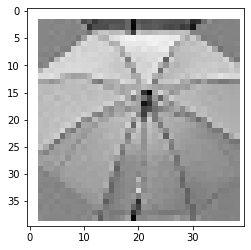

In [285]:
show(T)

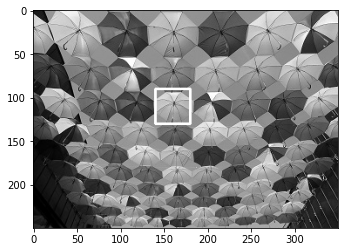

In [23]:
I = cv.imread("pic/umbrella250x350.jpg", 0)

T = I[90:130, 140:180] # 40x40
T = cv.resize(T, (40,40))

ih, iw = I.shape
th, tw = T.shape

# I = add_noise(I)

Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)

Tx = cv.Sobel(T, cv.CV_64F, 1, 0)
Ty = cv.Sobel(T, cv.CV_64F, 0, 1)

res = np.zeros((ih-th, iw-tw), np.float64)

for i in range(ih - th):
    for j in range(iw - tw):
        Px = Ix[i:i+th, j:j+tw]
        Py = Iy[i:i+th, j:j+tw]
        score = get_score(Tx, Ty, Px, Py)
        res[i,j] = score
        
minv, maxv, minloc, maxloc = cv.minMaxLoc(res)

top_left = maxloc
bottom_right = (top_left[0] + tw, top_left[1] + th)
cv.rectangle(I, top_left, bottom_right, 255, 2)

show(I)

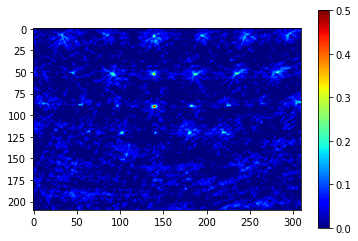

In [24]:
plt.imshow(res.clip(0, 0.5), cmap='jet')
plt.colorbar()
plt.show()

In [25]:
I = cv.imread("pic/umbrella250x350.jpg", 0)

T = I[90:130, 140:180] # 40x40
T = cv.resize(T, (40,40))

ih, iw = I.shape
th, tw = T.shape

# I = add_noise(I)

Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)

Tx = cv.Sobel(T, cv.CV_64F, 1, 0)
Ty = cv.Sobel(T, cv.CV_64F, 0, 1)

res = np.zeros((ih-th, iw-tw), np.float64)

for i in range(ih - th):
    for j in range(iw - tw):
        Px = Ix[i:i+th, j:j+tw]
        Py = Iy[i:i+th, j:j+tw]
        score = get_score(Tx, Ty, Px, Py)
        res[i,j] = score
        
minv, maxv, minloc, maxloc = cv.minMaxLoc(res)



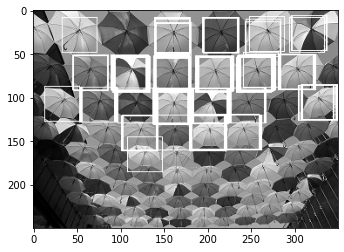

In [26]:
I = cv.imread("pic/umbrella250x350.jpg", 0)
thres = 0.16
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        if res[i,j] > thres:
            cv.rectangle(I, (j,i), (j+tw, i+th), 255, 1)

show(I)

In [27]:
cv.imwrite('pic/umbrella_match_div.jpg', I)

True

## 例子2

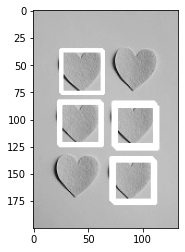

In [102]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

whole = cv.imread("pic/hearts200x133.jpg", 0)
whole2 = whole.copy()

heart = whole[36:75, 25:63] + 15

h, w = heart.shape[:2]
res = cv.matchTemplate(whole, heart, cv.TM_SQDIFF_NORMED)

# thresh = 0.005
thresh = 0.008
loc = np.where(res <= thresh)

for y1, x1 in zip(loc[0], loc[1]):
    x2, y2 = x1 + w, y1 + h
    cv.rectangle(whole, (x1, y1), (x2, y2), (255, 255, 0), 2)

show(whole)

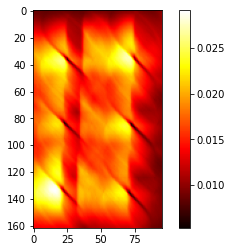

In [103]:
# plt.imshow(res, cmap='RdBu')
plt.imshow(res, cmap='hot')
plt.colorbar()
plt.show()

## 13.2 基于梯度的模板匹配

In [27]:
def get_score(Ax, Ay, Bx, By):
    Ar = np.sqrt(Ax**2 + Ay**2)
    Br = np.sqrt(Bx**2 + By**2)

    up = (Ax * Bx) + (Ay * By)
    down = Ar * Br
    
    score = (up / (down + 1e-9)).mean()
    return score

In [209]:
I = cv.imread("pic/eagle200x200.jpg", 0)

T = I[40:80, 120:160] - 20

ih, iw = I.shape
th, tw = T.shape

I = add_noise(I)

Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)

Tx = cv.Sobel(T, cv.CV_64F, 1, 0)
Ty = cv.Sobel(T, cv.CV_64F, 0, 1)

res = np.zeros((ih-th, iw-tw), np.float64)

for i in range(ih - th):
    for j in range(iw - tw):
        Px = Ix[i:i+th, j:j+tw]
        Py = Iy[i:i+th, j:j+tw]
        score = get_score(Tx, Ty, Px, Py)
        res[i,j] = score

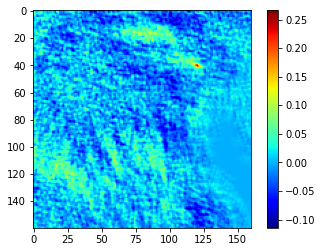

In [210]:
plt.imshow(res, cmap='jet')
plt.colorbar()
plt.show()

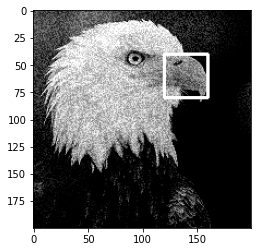

In [211]:
minv, maxv, minloc, maxloc = cv.minMaxLoc(res)

top_left = maxloc
bottom_right = (top_left[0] + tw, top_left[1] + th)
cv.rectangle(I, top_left, bottom_right, 255, 2)

show(I)